In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import datetime as dt

In [ ]:
url1 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/strains.csv'
url2 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/face-covering-policies-covid.csv'
url3 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/country_vaccinations_by_manufacturer.csv'
url4 = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
url5 = 'https://raw.githubusercontent.com/marmaluffalo/bigdataproject/master/covid-stringency-index.csv'

In [ ]:
strain = pd.read_csv(url1).fillna(0)
strain['Date'] = pd.to_datetime(strain['Date'])
#strain = strain[strain.columns.drop(list(strain.filter(regex='rolling|gaussian10')))]
strain = strain.drop(columns = ['Unnamed: 0'])
strain

,Date,CountryCode,CountryName,Population,alpha,iota,delta,mu,gamma,beta,lambda,eta,kappa
0,2020-01-01,ABW,Aruba,106957.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,ABW,Aruba,106957.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,ABW,Aruba,106957.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,ABW,Aruba,106957.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,ABW,Aruba,106957.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100597,2021-09-08,ZWE,Zimbabwe,14963051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100598,2021-09-09,ZWE,Zimbabwe,14963051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100599,2021-09-10,ZWE,Zimbabwe,14963051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100600,2021-09-11,ZWE,Zimbabwe,14963051.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mask = pd.read_csv(url2)
mask['Day'] = pd.to_datetime(mask['Day'])
mask.rename(columns={'Entity':'CountryName', 'Code':'CountryCode', 'Day':'Date'}, inplace=True)
mask

,CountryName,CountryCode,Date,facial_coverings
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
111752,Zimbabwe,ZWE,2021-09-02,3
111753,Zimbabwe,ZWE,2021-09-03,3
111754,Zimbabwe,ZWE,2021-09-04,3
111755,Zimbabwe,ZWE,2021-09-05,3


In [ ]:
vacsmanf = pd.read_csv(url3)
vacsmanf = vacsmanf.pivot_table(index = ['location', 'date'], columns = 'vaccine', values = 'total_vaccinations').reset_index()
vacsmanf['date'] = pd.to_datetime(vacsmanf['date'])
vacsmanf.rename(columns={'location':'CountryName', 'date':'Date'}, inplace=True)
vacsmanf

vaccine,CountryName,Date,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
0,Austria,2021-01-08,NaN,0.0,0.0,0.0,31391.0,NaN,NaN,NaN
1,Austria,2021-01-15,NaN,0.0,91.0,0.0,116786.0,NaN,NaN,NaN
2,Austria,2021-01-22,NaN,0.0,310.0,1.0,214635.0,NaN,NaN,NaN
3,Austria,2021-01-29,NaN,0.0,4263.0,2.0,259635.0,NaN,NaN,NaN
4,Austria,2021-02-05,NaN,0.0,5967.0,10.0,355577.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4618,Uruguay,2021-09-10,NaN,NaN,NaN,86597.0,1912124.0,NaN,3245229.0,NaN
4619,Uruguay,2021-09-11,NaN,NaN,NaN,86597.0,1912273.0,NaN,3245230.0,NaN
4620,Uruguay,2021-09-12,NaN,NaN,NaN,86597.0,1912273.0,NaN,3245230.0,NaN
4621,Uruguay,2021-09-13,NaN,NaN,NaN,86598.0,1925582.0,NaN,3245330.0,NaN


In [ ]:
owid = pd.read_csv(url4)
owid['date'] = pd.to_datetime(owid['date'])
owid.rename(columns={'location':'CountryName', 'iso_code':'CountryCode', 'date':'Date'}, inplace=True)
owid

,CountryCode,continent,CountryName,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,2021-09-13,126399.0,130.0,104.000,4543.0,5.0,7.143,8375.137,8.614,6.891,301.017,0.331,0.473,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4063.0,1188549.0,78.753,0.269,3654.0,0.242,0.028,35.1,tests performed,4752356.0,2856655.0,1895701.0,NaN,NaN,41369.0,31.49,18.93,12.56,NaN,2741.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117462,ZWE,Africa,Zimbabwe,2021-09-14,126817.0,418.0,145.857,4550.0,7.0,6.714,8402.833,27.696,9.664,301.481,0.464,0.445,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5427.0,1193976.0,79.112,0.360,3900.0,0.258,0.037,26.7,tests performed,4800761.0,2873593.0,1927168.0,NaN,48405.0,43831.0,31.81,19.04,12.77,NaN,2904.0,65.74,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
117463,ZWE,Africa,Zimbabwe,2021-09-15,127083.0,266.0,164.571,4551.0,1.0,4.857,8420.459,17.625,10.904,301.547,0.066,0.322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6482.0,1200458.0,79.542,0.429,38

In [ ]:
lagdeath = owid[['CountryName', 'Date',
                 'new_deaths', 'new_deaths_per_million',
                 'new_cases', 'new_cases_per_million',
                 'icu_patients', 'icu_patients_per_million',
                 'hosp_patients',	'hosp_patients_per_million']]
#time_change = dt.timedelta(days=8)
lagdeath['LagDate'] = lagdeath['Date'] + pd.DateOffset(60)
lagdeath

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CountryName,Date,new_deaths,new_deaths_per_million,new_cases,new_cases_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,LagDate
0,Afghanistan,2020-02-24,NaN,NaN,5.0,0.126,NaN,NaN,NaN,NaN,2020-04-24
1,Afghanistan,2020-02-25,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-25
2,Afghanistan,2020-02-26,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-26
3,Afghanistan,2020-02-27,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-27
4,Afghanistan,2020-02-28,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-28
...,...,...,...,...,...,...,...,...,...,...,...
117461,Zimbabwe,2021-09-13,5.0,0.331,130.0,8.614,NaN,NaN,NaN,NaN,2021-11-12
117462,Zimbabwe,2021-09-14,7.0,0.464,418.0,27.696,NaN,NaN,NaN,NaN,2021-11-13
117463,Zimbabwe,2021-09-15,1.0,0.066,266.0,17.625,NaN,NaN,NaN,NaN,2021-11-14
117464,Zimbabwe,2021-09-16,9.0,0.596,285.0,18.884,NaN,NaN,NaN,NaN,2021-11-15


In [ ]:
lagdeath = lagdeath.drop(columns = ['Date'])
lagdeath.rename(columns={'LagDate':'Date'}, inplace=True)
lagdeath.columns=lagdeath.columns.map(lambda x : x+'_31' if x !='CountryName' and x!='Date' else x)
lagdeath.head()

,CountryName,new_deaths_31,new_deaths_per_million_31,new_cases_31,new_cases_per_million_31,icu_patients_31,icu_patients_per_million_31,hosp_patients_31,hosp_patients_per_million_31,Date
0,Afghanistan,NaN,NaN,5.0,0.126,NaN,NaN,NaN,NaN,2020-04-24
1,Afghanistan,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-25
2,Afghanistan,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-26
3,Afghanistan,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-27
4,Afghanistan,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,2020-04-28


In [ ]:
owid = owid.merge(right=lagdeath, how = 'left', on = ['CountryName', 'Date'], copy=False)
owid.query("CountryCode=='USA' and Date > '2021-08-01' and Date < '2021-09-01'")

,CountryCode,continent,CountryName,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,new_deaths_31,new_deaths_per_million_31,new_cases_31,new_cases_per_million_31,icu_patients_31,icu_patients_per_million_31,hosp_patients_31,hosp_patients_per_million_31
111880,USA,North America,United States,2021-08-02,35199884.0,120727.0,85800.571,613873.0,461.0,393.143,105732.323,362.636,257.725,1843.933,1.385,1.181,1.42,13495.0,40.536,51782.0,155.541,NaN,NaN,NaN,NaN,960937.0,493863492.0,1483.452,2.886,935489.0,2.810,0.092,10.9,tests performed,346924345.0,191818585.0,164919666.0,NaN,467676.0,673185.0,103.15,57.03,49.04,NaN,2002.0,49.54,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,619.0,1.859,19190.0,57.642,5175.0,15.545,17627.0,52.947
111881,USA,North America,United States,2021-08-03,35302630.0,102746.0,90705.286,614462.0,589.0,413.857,106040.948,308.625,272.458,1845.702,1.769,1.243,1.41,14050.0,42.203,54440.0,163.525,NaN,NaN,NaN,NaN,1256616.0,495120108.0,1487.226,3.775,968244.0,2.908,0.094,10.7,tests performed,347377149.0,192120576.0,165081416.0,NaN,452804.0,681373.0,103.29,57.12,49.08,NaN,2026.0,49.54,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,527.0,1.583,16909.0,50.791,4995.0,15.004,16964.0,50.956
111882,USA,North America,United States,2021-08-04,35399460.0,96830.0,94667.857,614959.0,497.0,429.000,106331.803,290.855,284.360,1847.195,1.493,1.289,1.39,14633.0,43.954,56913.0,170.954,NaN,NaN,NaN,NaN,1312056.0,496432164.0,1491.168,3.941,998944.0,3.001,0.095,10.6,tests performed,348102478.0,192614017.0,165334987.0,NaN,725329.0,677279.0,103.50,57.27,49.16,NaN,2014.0,49.54,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,385.0,1.156,14336.0,43.062,4768.0,14.322,16290.0,48.931
111883,USA,North America,United States,2021-08-05,35510108.0,110648.0,99114.857,615503.0,544.0,460.000,106664.164,332.361,297.718,1848.829,1.634,1.382,1.39,15190.0,45.627,59542.0,178.850,NaN,NaN,NaN,NaN,1367305.0,497799469.0,1495.275,4.107,1037413.0,3.116,0.096,10.5,tests performed,348966419.0,193199353.0,165637566.0,NaN,863941.0,699261.0,103.76,57.44,49.25,NaN,2079.0,49.54,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,172.0,0.517,5672.0,17.037,4677.0,14.049,15981.0,48.003
111884,USA,North America,United States,2021-08-06,35765158.0,255050.0,108531.286,616660.0,1157.0,497.286,107430.275,766.111,326.003,1852.304,3.475,1.494,1.40,15730.0,47.249,62068.0,186.438,NaN,NaN,NaN,NaN,1322415.0,499121884.0,1499.247,3.972,1077909.0,3.238,0.101,9.9,tests performed,349787479.0,193764457.0,165918256.0,NaN,821060.0,694138.0,104.00,57.61,49.33,NaN,2064.0,49.54,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN

In [ ]:
stringency = pd.read_csv(url5)
stringency['Day'] = pd.to_datetime(stringency['Day'])
stringency.rename(columns={'Entity':'CountryName', 'Code':'CountryCode', 'Day':'Date'}, inplace=True)
stringency

,CountryName,CountryCode,Date,stringency_index
0,Afghanistan,AFG,2020-01-21,0.00
1,Afghanistan,AFG,2020-01-22,0.00
2,Afghanistan,AFG,2020-01-23,0.00
3,Afghanistan,AFG,2020-01-24,0.00
4,Afghanistan,AFG,2020-01-25,0.00
...,...,...,...,...
109050,Zimbabwe,ZWE,2021-09-10,65.74
109051,Zimbabwe,ZWE,2021-09-11,65.74
109052,Zimbabwe,ZWE,2021-09-12,65.74
109053,Zimbabwe,ZWE,2021-09-13,65.74


In [ ]:
mergedf = pd.merge(owid, mask, how = 'left', on = ['CountryName', 'CountryCode', 'Date'])
#mergedf = mergedf.merge(right=vacsmanf, how = 'left', on = ['CountryName', 'Date'], copy=False)
#mergedf = mergedf.merge(right=stringency, how = 'right', on = ['CountryName', 'CountryCode', 'Date'], copy=False)
mergedf = mergedf.merge(right=strain, how = 'left', on = ['CountryName', 'CountryCode', 'Date'], copy=False)
mergedf = mergedf[mergedf['Date'] > '2020-07-01']

mergedf

,CountryCode,continent,CountryName,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,new_deaths_31,new_deaths_per_million_31,new_cases_31,new_cases_per_million_31,icu_patients_31,icu_patients_per_million_31,hosp_patients_31,hosp_patients_per_million_31,facial_coverings,Population,alpha,iota,delta,mu,gamma,beta,lambda,eta,kappa
129,AFG,Asia,Afghanistan,2020-07-02,32108.0,260.0,263.857,811.0,33.0,18.857,806.016,6.527,6.624,20.359,0.828,0.473,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.70,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,3.0,38928341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,AFG,Asia,Afghanistan,2020-07-03,32410.0,302.0,294.857,823.0,12.0,19.857,813.597,7.581,7.402,20.660,0.301,0.498,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.70,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,3.0,38928341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,AFG,Asia,Afghanistan,2020-07-04,32758.0,348.0,293.714,830.0,7.0,17.571,822.333,8.736,7.373,20.836,0.176,0.441,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.70,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,3.0,38928341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,AFG,Asia,Afghanistan,2020-07-05,33037.0,279.0,283.429,868.0,38.0,19.286,829.337,7.004,7.115,21.790,0.954,0.484,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.70,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,23.0,0.577,755.0,18.953,NaN,NaN,NaN,NaN,3.0,38928341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,AFG,Asia,Afghanistan,2020-07-06,33150.0,113.0,260.857,891.0,23.0,22.000,832.174,2.837,6.548,22.367,0.577,0.552,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.70,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,9.0,0.226,168.0,4.217,NaN,NaN,NaN,NaN,3.0,38928341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117461,ZWE,Africa,Zimbabwe,2021-09-13,126399.0,130.0,104.000,4543.0,5.0,7.143,8375.137,8.614,6.891,301.017,0.331,0.4

In [ ]:
from google.colab import files
mergedf.to_csv('mergedf.csv') 
files.download('mergedf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#aruba = mergedf[mergedf['Date'] > '2020-03-01']
aruba = strain[strain['CountryName'] == 'United States']

In [ ]:
strplt = pd.melt(aruba, id_vars=['Date', 'CountryName', 'CountryCode', 'Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


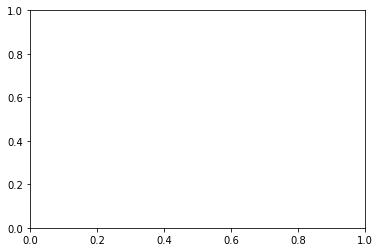

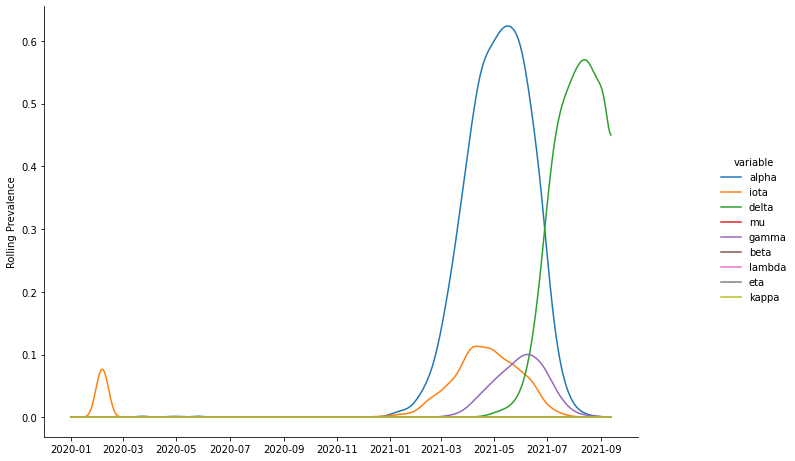

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots()
g = sns.relplot(x="Date", y="value", hue="variable", kind="line", data=strplt, ax = ax)
g.set(xlabel = '', ylabel = 'Rolling Prevalence')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

plt.show()

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mergedf = pd.read_csv('mergedf.csv')

In [ ]:

X = mergedf

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
#imputer = imputer.fit(X.iloc[:, 1:83])
#X.iloc[:, 1:83] = imputer.transform(X.iloc[:, 1:83]) 


X =  X.drop(columns=['alpha', 'iota', 'delta','mu', 'gamma','beta', 'lambda', 'eta', 'kappa', 'Population' ])

newdf = X


corrMatrix = newdf.corr()
print(corrMatrix)


deaths = newdf[['new_deaths_per_million_31','facial_coverings', 'stringency_index', 'people_fully_vaccinated_per_hundred']]
deaths =  deaths.dropna(axis='rows')


# Use only one feature
deaths_X = deaths[['facial_coverings', 'stringency_index','people_fully_vaccinated_per_hundred']]
deaths_y = deaths['new_deaths_per_million_31']



# define variables from the dataset

X_train, X_test, y_train, y_test = train_test_split(deaths_X, deaths_y, test_size=0.33, random_state=42)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
deaths_y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, deaths_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, deaths_y_pred))

# Plot outputs
X_test=np.arange(0,len(X_test),1)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, deaths_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.xlabel('inputs')
plt.ylabel('predicted deaths');


plt.show()